In [1]:
import proveit.specialStatementMagic # for %begin_axioms and %end_axioms
from proveit.basiclogic import Forall, Equals, Iff, In
from proveit.linalg import ScalarProd, TensorProd, TensorExp, MatrixProd, SU
from proveit.physics.quantum import Bra, Ket, RegisterBra, RegisterKet, Meas, Circuit, Gate, Input, Output, MultiWire
from proveit.physics.quantum.common import I, X, Y, Z, H, ket0, ket1, ketPlus, \
    QubitSpace, QubitRegisterSpace, RegisterSU, CTRL_DN, PASS
from proveit.common import k, n, U, x, y, alpha
from proveit.number.common import zero, one, two
from proveit.number.numberSets import NaturalsPos, Complexes
from proveit.number import Exponentiate, Add, Subtract, DiscreteContiguousSet, Fraction, Sqrt

In [2]:
%begin_axioms

In [3]:
ketZeroInQubitSpace = In(ket0, QubitSpace)
ketZeroInQubitSpace

In [4]:
ketOneInQubitSpace = In(ket1, QubitSpace)
ketOneInQubitSpace

In [5]:
singleQubitRegisterZero = Equals(RegisterKet(zero, one), ket0)
singleQubitRegisterZero

In [6]:
singleQubitRegisterOne = Equals(RegisterKet(one, one), ket1)
singleQubitRegisterOne

In [7]:
expandRegisterWithZeroKet = Forall(n, 
                               Forall(k, Equals(RegisterKet(k, Add(n, one)), 
                                              TensorProd(RegisterKet(k, n), ket0)),
                                      domain=DiscreteContiguousSet(zero, 
                                                                   Subtract(Exponentiate(two, n), one))),
                               domain=NaturalsPos)
expandRegisterWithZeroKet

In [8]:
expandRegisterWithOneKet = Forall(n, 
                               Forall(k, Equals(RegisterKet(Add(k, Exponentiate(two, n)), Add(n, one)), 
                                              TensorProd(RegisterKet(k, n), ket1)),
                                      domain=DiscreteContiguousSet(zero, 
                                                                   Subtract(Exponentiate(two, n), one))),
                               domain=NaturalsPos)
expandRegisterWithOneKet

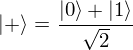

In [9]:
ketPlusDef = Equals(ketPlus, Fraction(Add(ket0, ket1), Sqrt(two)))
ketPlusDef

In [10]:
hadamardOnZero = Equals(MatrixProd(H, ket0), ketPlus)
hadamardOnZero

In [11]:
circuitGateApplication = Forall(U, 
                                Forall((x, y),
                                       Iff(Circuit([[Input(x), Gate(U), Output(y)]]), 
                                           Equals(y, MatrixProd(U, x))),
                                       domain=QubitSpace),
                                domain=SU(two))
circuitGateApplication

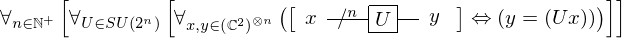

In [12]:
circuitMultiGateApplication = Forall(n, 
                                     Forall(U, 
                                            Forall((x, y),
                                                   Iff(Circuit([[Input(x), MultiWire(n), Gate(U), Output(y)]]), 
                                                       Equals(y, MatrixProd(U, x))),
                                                   domain=QubitRegisterSpace(n)), 
                                            domain=RegisterSU(n)),
                                     domain=NaturalsPos)
circuitMultiGateApplication

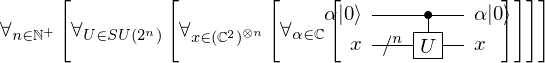

In [13]:
zeroControlledNgate = Forall(n, 
                             Forall(U, 
                                    Forall(x, 
                                           Forall(alpha, 
                                                  Circuit([[Input(ScalarProd(alpha, ket0)), PASS, CTRL_DN, Output(ScalarProd(alpha, ket0))],
                                                           [Input(x), MultiWire(n), Gate(U), Output(x)]]), 
                                                  domain=Complexes),
                                           domain=QubitRegisterSpace(n)), 
                                    domain=SU(Exponentiate(two, n))), 
                             domain=NaturalsPos)
zeroControlledNgate

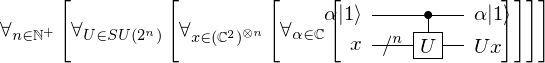

In [14]:
oneControlledNgate = Forall(n, 
                             Forall(U, 
                                    Forall(x, 
                                           Forall(alpha, 
                                                  Circuit([[Input(ScalarProd(alpha, ket1)), PASS, CTRL_DN, Output(ScalarProd(alpha, ket1))],
                                                           [Input(x), MultiWire(n), Gate(U), Output(MatrixProd(U, x))]]), 
                                                  domain=Complexes),
                                           domain=QubitRegisterSpace(n)), 
                                    domain=SU(Exponentiate(two, n))), 
                             domain=NaturalsPos)
oneControlledNgate

In [15]:
%end_axioms

Creating axioms *.dill and *.pv_it files in the __pv_it__ directory
These axioms may be imported from proveit.physics.quantum.axioms
